# Essamble Techniques Project work.



Submitted By
##### Akhilesh Razdan 

1. Data Understanding & Exploration: [5 Marks]</BR>
A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]</BR>
B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]</BR>
C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]</BR>
D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]
2. Data Cleaning & Analysis: [5 Marks]</BR>
A. Impute missing/unexpected values in the DataFrame. [2 Marks]</BR>
B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]</BR>
[For Example: MonthlyCharges, TotalCharges]</BR>
C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
distribution in the pie-chart. [4 Marks]</BR>
D. Share insights for Q2.c. [2 Marks]</BR>
E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]</BR>
F. Split the data into 80% train and 20% test. [1 Marks]</BR>
G. Normalize/Standardize the data with the best suitable approach. [2 Marks]</BR>
3. Model building and Improvement: [10 Marks]</BR>
A. Train a model using XGBoost and use RandomizedSearchCV to train on best parameters. Also print best performing parameters along with train and
test performance. [5 Marks]</BR>
B. Train a model using XGBoost and use GridSearchCV to train on best parameters. Also print best performing parameters along with train and test
performance. [5 Marks]</BR>

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xgboost as xg
import pickle
from datetime import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data from csv
dataframe1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
dataframe2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
#Displaying data read in csv
dataframe1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes


In [3]:
#Displaying data read in csv
dataframe2.head(3)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
#Merging 2 data base to form one Dataframe
dataframe = pd.merge(dataframe1,dataframe2, how='inner', on='customerID')
#Displaying data read in csv
dataframe.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
# getting column names to match and check if there is any mismatch
Col_dataframe= dataframe.columns
Col_dataframe1= dataframe1.columns
Col_dataframe2= dataframe2.columns
Len_Col_dataframe1 = len(Col_dataframe1)
Len_Col_dataframe2 = len(Col_dataframe2)
#Check all columns are imported from dataset 1
print('Checking columns for dataframe 1')
for i in range(Len_Col_dataframe1):
    if Col_dataframe1[i] in Col_dataframe:print(f'Column {Col_dataframe1[i]} found in merged dataframe')
    else: print(f'Error Column {Col_dataframe1[i]} not found in merged dataframe')
#Check all columns are imported from dataset 2    
print('Checking columns for dataframe 2')
for i in range(Len_Col_dataframe2):
    if Col_dataframe2[i] in Col_dataframe:print(f'Column {Col_dataframe2[i]} found in merged dataframe')
    else: print(f'Error Column {Col_dataframe2[i]} not found in merged dataframe')


Checking columns for dataframe 1
Column customerID found in merged dataframe
Column gender found in merged dataframe
Column SeniorCitizen found in merged dataframe
Column Partner found in merged dataframe
Column Dependents found in merged dataframe
Column tenure found in merged dataframe
Column PhoneService found in merged dataframe
Column MultipleLines found in merged dataframe
Column InternetService found in merged dataframe
Column OnlineSecurity found in merged dataframe
Checking columns for dataframe 2
Column customerID found in merged dataframe
Column OnlineBackup found in merged dataframe
Column DeviceProtection found in merged dataframe
Column TechSupport found in merged dataframe
Column StreamingTV found in merged dataframe
Column StreamingMovies found in merged dataframe
Column Contract found in merged dataframe
Column PaperlessBilling found in merged dataframe
Column PaymentMethod found in merged dataframe
Column MonthlyCharges found in merged dataframe
Column TotalCharges fo

In [6]:
# replacing irregular values in data
dataframe.replace({'na', np.nan})
dataframe.replace({'NA', np.nan})
dataframe.replace({'N.A.', np.nan})
dataframe.replace({'n/a', np.nan})
dataframe.replace({'-', np.nan})
dataframe.replace({'--', np.nan})
dataframe.replace({'?', np.nan})
# find spaces and replace them with nan values
dataframe['TotalCharges'] = dataframe['TotalCharges'].replace(r'^\s*$', np.NaN, regex=True)
dataframe['MonthlyCharges'] = dataframe['MonthlyCharges'].replace(r'^\s*$', np.NaN, regex=True)
dataframe.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 values to impute from total charges column

In [7]:
#removing spaces from TotalChanges Column
dataframe['TotalCharges'].fillna(dataframe['TotalCharges'].median(), inplace=True)
#getting count of null values
dataframe.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#checking data types of dataframe
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Changing the data type to float for required column
dataframe['tenure']= dataframe.tenure.astype(float)
dataframe['MonthlyCharges']=dataframe.MonthlyCharges.astype(float)
dataframe['TotalCharges']=pd.to_numeric(dataframe['TotalCharges'],errors = 'coerce')
dataframe['TotalCharges']=dataframe.TotalCharges.astype(float)
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
# function Defination for getting various pie chats to infer data
def SeniorCitizen(dataframe):
    lab=dataframe['SeniorCitizen'].unique()
    ax = (dataframe['SeniorCitizen'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Senior Citizens',fontsize = 12)
    ax.set_title('% of Senior Citizens', fontsize = 12)
    return ax

def gender(dataframe):
    lab=dataframe['gender'].unique()
    ax = (dataframe['gender'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Senior Citizens',fontsize = 12)
    ax.set_title('% of Men and Women', fontsize = 12)
    return ax

def Partner(dataframe):
    lab=dataframe['Partner'].unique()
    ax = (dataframe['Partner'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Partner',fontsize = 12)
    ax.set_title('% of Partner', fontsize = 12)
    return ax

def Dependents(dataframe):
    lab=dataframe['Dependents'].unique()
    ax = (dataframe['Dependents'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Dependents',fontsize = 12)
    ax.set_title('% of Dependents', fontsize = 12)
    return ax

def PhoneService(dataframe):
    lab=dataframe['PhoneService'].unique()
    ax = (dataframe['PhoneService'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('PhoneService',fontsize = 12)
    ax.set_title('% of PhoneService', fontsize = 12)
    return ax

def MultipleLines(dataframe):
    lab=dataframe['MultipleLines'].unique()
    ax = (dataframe['MultipleLines'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('MultipleLines',fontsize = 12)
    ax.set_title('% of MultipleLines', fontsize = 12)
    return ax

def InternetService(dataframe):
    lab=dataframe['InternetService'].unique()
    ax = (dataframe['InternetService'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('InternetService',fontsize = 12)
    ax.set_title('% of InternetService', fontsize = 12)
    return ax

def OnlineSecurity(dataframe):
    lab=dataframe['OnlineSecurity'].unique()
    ax = (dataframe['OnlineSecurity'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('OnlineSecurity',fontsize = 12)
    ax.set_title('% of OnlineSecurity', fontsize = 12)
    return ax

def OnlineBackup(dataframe):
    lab=dataframe['OnlineBackup'].unique()
    ax = (dataframe['OnlineBackup'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('OnlineBackup',fontsize = 12)
    ax.set_title('% of OnlineBackup', fontsize = 12)
    return ax

def DeviceProtection(dataframe):
    lab=dataframe['DeviceProtection'].unique()
    ax = (dataframe['DeviceProtection'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('DeviceProtection',fontsize = 12)
    ax.set_title('% of DeviceProtection', fontsize = 12)
    return ax

def TechSupport(dataframe):
    lab=dataframe['TechSupport'].unique()
    ax = (dataframe['TechSupport'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('TechSupport',fontsize = 12)
    ax.set_title('% of TechSupport', fontsize = 12)
    return ax

def StreamingTV(dataframe):
    lab=dataframe['StreamingTV'].unique()
    ax = (dataframe['StreamingTV'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('StreamingTV',fontsize = 12)
    ax.set_title('% of StreamingTV', fontsize = 12)
    return ax

def Contract(dataframe):
    lab=dataframe['Contract'].unique()
    ax = (dataframe['Contract'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Contract',fontsize = 12)
    ax.set_title('% of Contract', fontsize = 12)
    return ax

def PaperlessBilling(dataframe):
    lab=dataframe['PaperlessBilling'].unique()
    ax = (dataframe['PaperlessBilling'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('PaperlessBilling',fontsize = 12)
    ax.set_title('% of PaperlessBilling', fontsize = 12)
    return ax

def PaymentMethod(dataframe):
    lab=dataframe['PaymentMethod'].unique()
    ax = (dataframe['PaymentMethod'].value_counts()*100.0 /len(dataframe))\
    .plot.pie(autopct='%.1f%%', labels = lab,figsize =(5,5), fontsize = 12 )                                                                           
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('PaymentMethod',fontsize = 12)
    ax.set_title('% of PaymentMethod', fontsize = 12)
    return ax

<AxesSubplot:title={'center':'% of Senior Citizens'}, ylabel='Senior Citizens'>

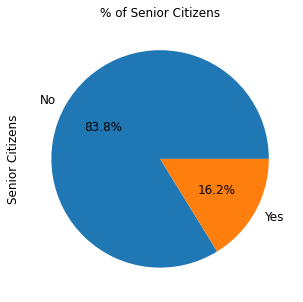

In [11]:
#Get pie Chat SeniorCitizen
SeniorCitizen(dataframe)

It Clear from the Pie Chart above that majorty users of telecome are Non- senior citizens.

<AxesSubplot:title={'center':'% of Men and Women'}, ylabel='Senior Citizens'>

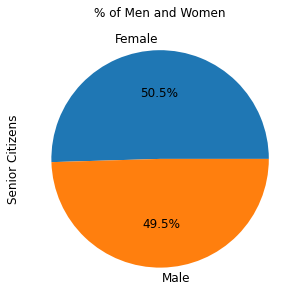

In [12]:
#Get pie Chat gender
gender(dataframe)

From the above pie chart we can concur that there are almost same number of males and females in the Group.

<AxesSubplot:title={'center':'% of Partner'}, ylabel='Partner'>

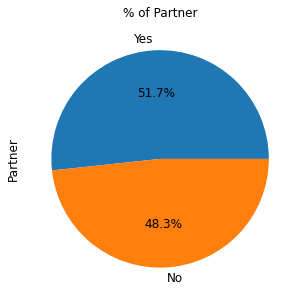

In [13]:
#Get pie Chat Partner
Partner(dataframe)

From the above pie chart we can concur that there are slightly more people with parnters than singles

<AxesSubplot:title={'center':'% of Dependents'}, ylabel='Dependents'>

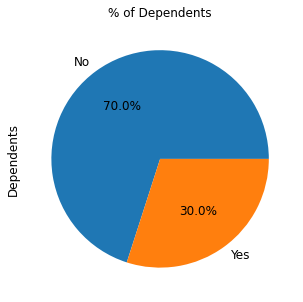

In [14]:
#Get pie Chat Dependents
Dependents(dataframe)

70% of users are Independent and only 30% are dependent then less number of user are dependent

<AxesSubplot:title={'center':'% of PhoneService'}, ylabel='PhoneService'>

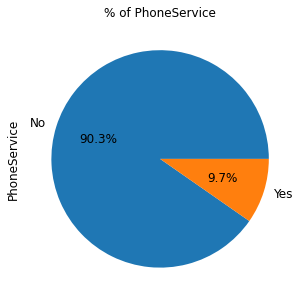

In [15]:
#Get pie Chat PhoneService
PhoneService(dataframe)

Majority of user don't use Phone service and only about 10% use phone service.

<AxesSubplot:title={'center':'% of MultipleLines'}, ylabel='MultipleLines'>

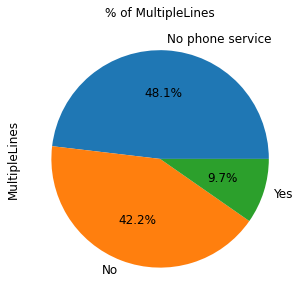

In [16]:
#Get Pie Chat MultipleLines
MultipleLines(dataframe)

Only about 10% users use Multiple line and about 42% donot use Multiple lines but Majorty (48%) have No phone service.

<AxesSubplot:title={'center':'% of InternetService'}, ylabel='InternetService'>

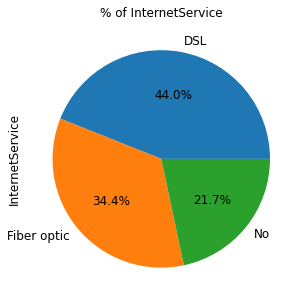

In [17]:
#Get Pie Chat InternetService
InternetService(dataframe)

Majorty Users use Internet service (about 78%) and sit clear that DSL is the Leading Internet(44% market captured) service Provider.

<AxesSubplot:title={'center':'% of OnlineSecurity'}, ylabel='OnlineSecurity'>

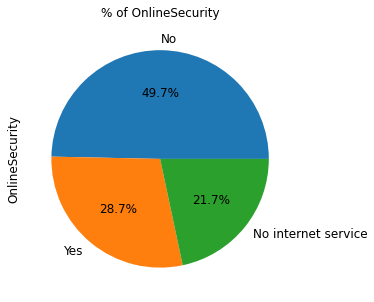

In [18]:
#Get Pie Chat OnlineSecurity
OnlineSecurity(dataframe)

Majorty Users don't have opted online security and about 22% don't have internet Sevices, And those who do have internet Sevices only about 29% have opted online security.

<AxesSubplot:title={'center':'% of DeviceProtection'}, ylabel='DeviceProtection'>

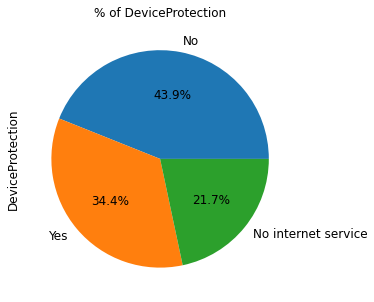

In [19]:
#Get Pie Chat DeviceProtection
DeviceProtection(dataframe)

Majorty(about 44%) Users don't have opted Device Protection and about 22% don't have internet Sevices, And those who do have internet Sevices only about 34.5% have opted Device Protection.

<AxesSubplot:title={'center':'% of TechSupport'}, ylabel='TechSupport'>

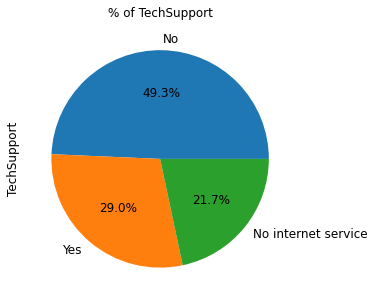

In [20]:
#Get Pie Chat TechSupport
TechSupport(dataframe)

Majorty(about 49%) Users don't have opted Tech-Support and about 22% don't have internet Sevices, And those who do have internet Sevices only 29% have opted Tech-Support.

<AxesSubplot:title={'center':'% of StreamingTV'}, ylabel='StreamingTV'>

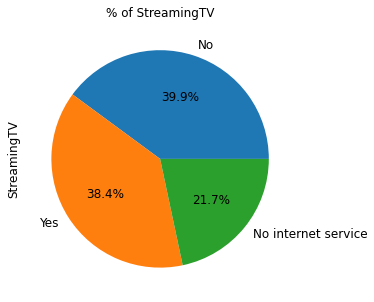

In [21]:
#Get Pie Chat StreamingTV
StreamingTV(dataframe)

Majorty(about 49%) Users don't have opted Tech-Support and about 22% don't have internet Sevices, And those who do have internet Sevices only 29% have opted Tech-Support.

<AxesSubplot:title={'center':'% of Contract'}, ylabel='Contract'>

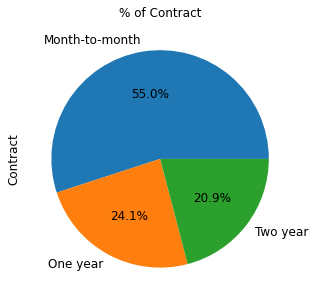

In [22]:
#Get Pie Chat Contract
Contract(dataframe)

Majorty(about 55%) Users have opted for Month-to-Month payment and only 21% have opted for 2 year contract. Lastly 24% have opted for One year contract. Thus it clear most people dont opt for long duration i.e. 2 year contract.

<AxesSubplot:title={'center':'% of PaperlessBilling'}, ylabel='PaperlessBilling'>

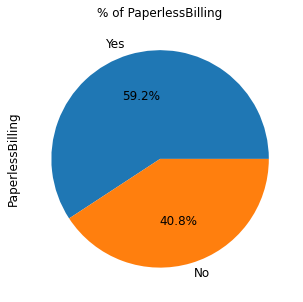

In [23]:
#Get Pie Chat PaperlessBilling
PaperlessBilling(dataframe)

Majorty(about 59%) Users have opted for Paperless / online Billing.

<AxesSubplot:title={'center':'% of PaymentMethod'}, ylabel='PaymentMethod'>

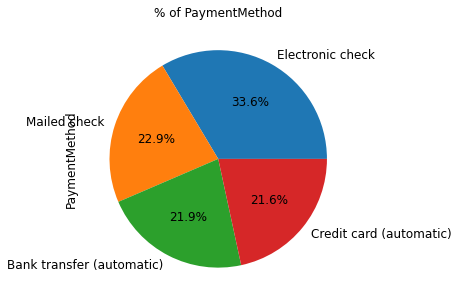

In [24]:
#Get Pie Chat PaymentMethod
PaymentMethod(dataframe)

Most users(34%) opted for Electronic Check and about 45 % have AUtomatioc payment option whether it be BankTransfer or Credit card. For all 4 catagories it seems that users seem to be somewhat evenly distributed.

In [25]:
#Encoding the Data for catagolical values
Col_dataframe=Col_dataframe.drop('tenure')
Col_dataframe=Col_dataframe.drop('MonthlyCharges')
Col_dataframe=Col_dataframe.drop('TotalCharges')
Leng= len(Col_dataframe)
for j in range(Leng):
    dataframe[Col_dataframe[j]]=dataframe[Col_dataframe[j]].astype('category')
    dataframe[Col_dataframe[j]]=dataframe[Col_dataframe[j]].cat.codes
dataframe.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1


In [26]:
#Droping customerID column as we dont need this for performing model
Df=dataframe.drop(['customerID'], axis=1)

In [27]:
#split the dataset into training and test datasets
# Transform data into features and target
X = np.array(Df.iloc[:, 0:19]) 
y= np.array(Df['Churn']) 
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 19)
(5634,)
(1409, 19)
(1409,)


In [28]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaledX_Train = scaler.fit_transform(X_train)
scaledX_Test = scaler.fit_transform(X_test)

In [29]:
#Creating XGboost Model
model = xg.XGBClassifier(use_label_encoder=False)
model.fit(scaledX_Train, y_train)
y_pred = model.predict(scaledX_Test)
# evaluate predictions
print("Accuracy using XGBoost for test data = {}".format(accuracy_score(y_test, y_pred)))
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))

[19:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy using XGBoost for test data = 0.7686302342086586
Precision = 0.6999510480436911
Recall = 0.6751659820713529


In [55]:
#defining Pameters for Xgboost for Randoma and Grid Search CV
param_grid= {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1, 3, 5]
        }

In [56]:
#creating model for XGBoost for random CV 
xgCVmodel = xg.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgCVmodel, param_distributions=param_grid, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(scaledX_Train,y_train), verbose=3, random_state=1001 )

In [57]:
# Fitting the random XGBoost Model
random_search.fit(scaledX_Train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[20:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002272C7F3040>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           mi...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsample=None, tree_met

In [58]:
#print Best Scores and Parameter
print('\n Best Score:')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best Score:
0.8507063041386099

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [59]:
#prediting and Finding % accuracy.
y_predt = random_search.predict(scaledX_Test)
print("Accuracy using XGBoost for test data = {}".format(accuracy_score(y_test, y_predt)))
print("Precision = {}".format(precision_score(y_test, y_predt, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predt, average='macro')))

Accuracy using XGBoost for test data = 0.7913413768630234
Precision = 0.7340096160850877
Recall = 0.6991629853522436


In [60]:
#geting predictive accuracy for Tainset data
Train_Pred = random_search.predict(scaledX_Train)
accuracy = accuracy_score(y_train, Train_Pred)
print("Accuracy using XGBoost for test data = {}".format(accuracy_score(y_train, Train_Pred)))
print("Precision = {}".format(precision_score(y_train, Train_Pred, average='macro')))
print("Recall = {}".format(recall_score(y_train, Train_Pred, average='macro')))

Accuracy using XGBoost for test data = 0.8301384451544196
Precision = 0.7922508325548667
Recall = 0.749154425519227


<AxesSubplot:>

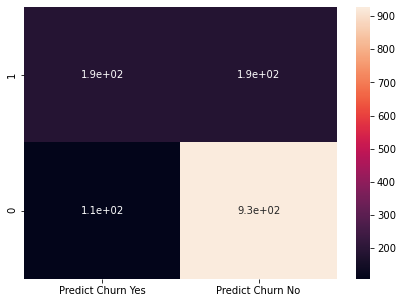

In [61]:
# Confusion matriax for the Model selected.
cm=metrics.confusion_matrix(y_test, y_predt, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Churn Yes","Predict Churn No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [65]:
#creating model for XGBoost for GridSearch CV
grid = GridSearchCV(estimator=xgCVmodel, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=skf.split(scaledX_Train,y_train), verbose=3 )


In [66]:
grid.fit(scaledX_Train,y_train)
#Printing best Parameters and Score
print('\n Best Score:')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
y_predt = grid.predict(scaledX_Test)
print("Accuracy using XGBoost for test data = {}".format(accuracy_score(y_test, y_predt)))
print("Precision = {}".format(precision_score(y_test, y_predt, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predt, average='macro')))

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[20:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Best Score:
0.8507063041386099

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}
Accuracy using XGBoost for test data = 0.7913413768630234
P

In [67]:
#Printing accuracy of Training set.
Train_Pred = random_search.predict(scaledX_Train)
print("Accuracy using XGBoost for test data = {}".format(accuracy_score(y_train, Train_Pred)))
print("Precision = {}".format(precision_score(y_train, Train_Pred, average='macro')))
print("Recall = {}".format(recall_score(y_train, Train_Pred, average='macro')))

Accuracy using XGBoost for test data = 0.8301384451544196
Precision = 0.7922508325548667
Recall = 0.749154425519227


<AxesSubplot:>

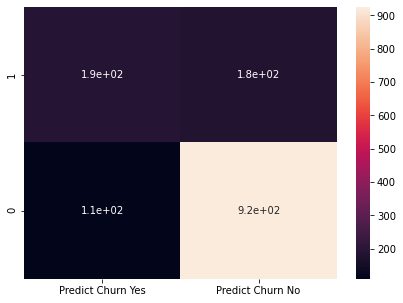

In [68]:
# Confusion matriax for the Model selected.
cm=metrics.confusion_matrix(y_test, y_predt, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict Churn Yes","Predict Churn No"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Thus best result is given by random CV xgboost. i.e.79.27%

1. Build a simple ML pipeline which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1
Dataset from Part 1 (single/merged).</Br>
2. Create separate functions for various purposes.</Br>
3. Various base models should be trained to select the best performing model.</Br>
4. Pickle file should be saved for the best performing model.</Br>
Include best coding practices in the code:</Br>
• Modularization</Br>
• Maintainability</Br>
• Well commented code etc.</Br>

In [69]:
#deinfing functions for Pipline.
def combineDataframe():
    df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
    df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
    df = pd.merge(dataframe1,dataframe2, how='inner', on='customerID')
    Filepath='SingleCombofile.csv'
    dataframe.to_csv('SingleCombofile.csv')
    return Filepath

In [70]:
def getFileToDataframe(Filepath):
    df = pd.read_csv(Filepath)
    print("Shape Of DataFrame:")
    print(df.shape)
    print("=========================================================================")
    return df

def removeNullValues(dataframe):
    dataframe.replace({'na', np.nan})
    dataframe.replace({'NA', np.nan})
    dataframe.replace({'N.A.', np.nan})
    dataframe.replace({'n/a', np.nan})
    dataframe.replace({'-', np.nan})
    dataframe.replace({'--', np.nan})
    dataframe.replace({'?', np.nan})
    dataframe['TotalCharges'] = dataframe['TotalCharges'].replace(r'^\s*$', np.NaN, regex=True)
    print("Printing Null Values Before Imputing")
    print(dataframe.isna().sum())
    print("=========================================================================")
    df=dataframe.dropna().copy()
    return dataframe

def changeRequiredDataToFloat(dataframe):
    dataframe['tenure']= dataframe.tenure.astype(float)
    dataframe['MonthlyCharges']=dataframe.MonthlyCharges.astype(float)
    dataframe['TotalCharges']=pd.to_numeric(dataframe['TotalCharges'],errors = 'coerce')
    dataframe['TotalCharges']=dataframe.TotalCharges.astype(float)
    print(dataframe.dtypes)
    print("=========================================================================")
    return dataframe

def SplitMethod(dataframe):
    Df=dataframe.drop(['customerID'], axis=1)
    Df['TotalCharges'] = Df['TotalCharges'].replace(r'^\s*$', np.NaN, regex=True)
    Df['TotalCharges'].fillna(Df['TotalCharges'].median(), inplace=True)
    #split the dataset into training and test datasets
    # Transform data into features and target
    X = np.array(Df.iloc[:, 0:19]) 
    y= np.array(Df['Churn']) 
    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    print("Training data shape")
    print(X_train.shape)
    print(y_train.shape)
    print("=========================================================================")
    print("Testing data shape")
    print(X_test.shape)
    print(y_test.shape)
    print("=========================================================================")
    return X_train, X_test, y_train, y_test

def EncoderMethod(dataframe):
    Col_dataframe= dataframe.columns
    Col_dataframe=Col_dataframe.drop('tenure')
    Col_dataframe=Col_dataframe.drop('MonthlyCharges')
    Col_dataframe=Col_dataframe.drop('TotalCharges')
    Leng= len(Col_dataframe)
    for j in range(Leng):
        dataframe[Col_dataframe[j]]=dataframe[Col_dataframe[j]].astype('category')
        dataframe[Col_dataframe[j]]=dataframe[Col_dataframe[j]].cat.codes
    return dataframe

In [71]:
#deinfing Piplines
def pipline1(X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf', LogisticRegression())
    ])
    # use the pipeline object as a classifier
    pipeline.fit(X_train,y_train)
    print("LogisticRegression")
    print(" Test score: {:.2f}". format( pipeline.score( X_test, y_test)))
    print(metrics.classification_report(y_test, y_pred))
    Acc1=accuracy_score(y_test, y_pred)
    Pre=precision_score(y_test, y_pred, average='macro')
    SULM="LogisticRegression"
    print("=========================================================================")
    return  SULM,Acc1*100,Pre*100
    
def pipline2(X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('svm', SVC())
    ])
    # use the pipeline object as a classifier
    pipeline.fit(X_train,y_train)
    print("SVM")
    print(" Test score: {:.2f}". format( pipeline.score( X_test, y_test)))
    print(metrics.classification_report(y_test, y_pred))
    Acc1=accuracy_score(y_test, y_pred)
    Pre=precision_score(y_test, y_pred, average='macro')
    SULM="Suport Vector Machine"
    print("=========================================================================")
    return  SULM,Acc1*100,Pre*100

def pipline3(X_train, X_test, y_train, y_test):
    knn_clf= KNeighborsClassifier()
    param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
    pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('gs',  GridSearchCV(knn_clf,param_grid,cv=10))
    ])
    
    # use the pipeline object as a classifier
    pipeline.fit(X_train,y_train)
    print("KNeighborsClassifier with Grid seach cv")
    print(" Test score: {:.2f}". format( pipeline.score( X_test, y_test)))
    print(metrics.classification_report(y_test, y_pred))
    Acc1=accuracy_score(y_test, y_pred)
    Pre=precision_score(y_test, y_pred, average='macro')
    SULM="KNeighborsClassifier"
    print("=========================================================================")
    return  SULM,Acc1*100,Pre*100

def pipline4(X_train, X_test, y_train, y_test):
    XGB= xg.XGBClassifier()
    param_grid= {
        'min_child_weight': [5],
        'gamma': [5],
        'subsample': [1],
        'colsample_bytree': [0.6],
        'max_depth': [5]
        }
    pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('gs',  GridSearchCV(XGB,param_grid,cv=10))
    ])
    # use the pipeline object as a classifier
    pipeline.fit(X_train,y_train)
    print("XGBClassifierGridSearchCV")
    print(" Test score: {:.2f}". format( pipeline.score( X_test, y_test)))
    print(metrics.classification_report(y_test, y_pred))
    Acc1=accuracy_score(y_test, y_pred)
    Pre=precision_score(y_test, y_pred, average='macro')
    SULM="XGBClassifierGridSearchCV"
    print("=========================================================================")
    return  SULM,Acc1*100,Pre*100

def pipline5(X_train, X_test, y_train, y_test):
    rfc=RandomForestClassifier(random_state=42)
    param_grid= {
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [7],
    'criterion' :['gini']
    }
    pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('gs',  GridSearchCV(rfc,param_grid,cv=8))
    ])
    # use the pipeline object as a classifier
    pipeline.fit(X_train,y_train)
    print("Random Forest")
    print(" Test score: {:.2f}". format( pipeline.score( X_test, y_test)))
    print(metrics.classification_report(y_test, y_pred))
    Acc1=accuracy_score(y_test, y_pred)
    Pre=precision_score(y_test, y_pred, average='macro')
    SULM="Random Forest"
    print("=========================================================================")
    return  SULM,Acc1*100,Pre*100

In [72]:
Filepath=combineDataframe()
def preprocessing():
    dataframe=getFileToDataframe(Filepath)
    dataframe=removeNullValues(dataframe)
    dataframe=changeRequiredDataToFloat(dataframe)
    dataframe=EncoderMethod(dataframe)
    X_train, X_test, y_train, y_test =SplitMethod(dataframe)
    return X_train, X_test, y_train, y_test
    
def pipelineFit(X_train, X_test, y_train, y_test):
    Score1=pipline1(X_train, X_test, y_train, y_test)
    Score2=pipline2(X_train, X_test, y_train, y_test)
    Score3=pipline3(X_train, X_test, y_train, y_test)
    Score4=pipline4(X_train, X_test, y_train, y_test)
    Score5=pipline5(X_train, X_test, y_train, y_test)
    Score=[Score1,Score2,Score3,Score4,Score5]
    return Score
    
def callingFunctions(Filepath):
    X_train, X_test, y_train, y_test=preprocessing()
    Score=pipelineFit(X_train, X_test, y_train, y_test)
    print(Score)
    print("=========================================================================")
    #note all models give same score Thus taking the model which take the least time i.e LogisticRegression 
    logi=LogisticRegression()
    model=logi.fit(X_train,y_train)
    with open('bestModel.pickle', 'wb') as f:
        pickle.dump(model, f)
    print("{} Model is fit".format(model))
    print("===============================END=======================================")
    return model
    return Score


In [73]:
Score=callingFunctions(Filepath)

Shape Of DataFrame:
(7043, 22)
Printing Null Values Before Imputing
Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Unnamed: 0            int64
customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies